In [1]:
# 导入需要使用的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 从远程URL下载数据
data_url = "https://raw.githubusercontent.com/fulyaec/gather/refs/heads/main/hc/Mall_Customers.csv"
dataset = pd.read_csv(data_url)
display(dataset)
# 选择第4、5列
X = dataset.iloc[:, [3, 4]]
display(X)
X = X.to_numpy()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


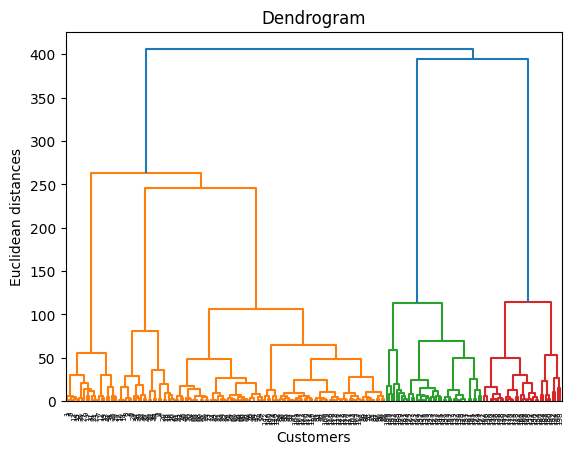

In [3]:
# 使用scipy提供的接口绘制dendrogram图
import scipy.cluster.hierarchy as sc
dendrogram = sc.dendrogram(sc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

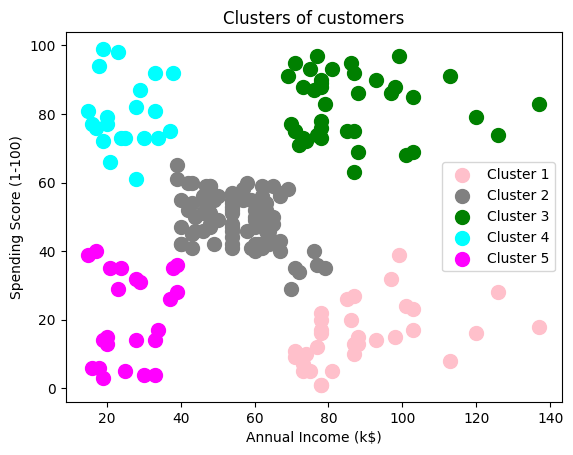

In [4]:
# 使用sklearn的层次聚类接口
## Import clustering module
from sklearn.cluster import AgglomerativeClustering
hca = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hca = hca.fit_predict(X)

## Visuvalization
plt.scatter(X[y_hca == 0, 0], X[y_hca == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_hca == 1, 0], X[y_hca == 1, 1], s = 100, c = 'gray', label = 'Cluster 2')
plt.scatter(X[y_hca == 2, 0], X[y_hca == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hca == 3, 0], X[y_hca == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hca == 4, 0], X[y_hca == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()